In [28]:
import numpy as np
import sep

In [46]:
import astropy.io.fits as astrofits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize']=[10.,8.]

#### Read in data:

In [82]:
#filename = astropy.utils.data.get_pkg_data_filename('./image.fits')#astrofits.util.get_testdata_filepath('image.fits')
#print(filename)
astrofits.info('image.fits')
file = astrofits.open('image.fits')
data = file[0].data#astrofits.getdata('image.fits')

Filename: image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     337   (256, 256)   int16 (rescales to float32)   


#### Show image

966.7967


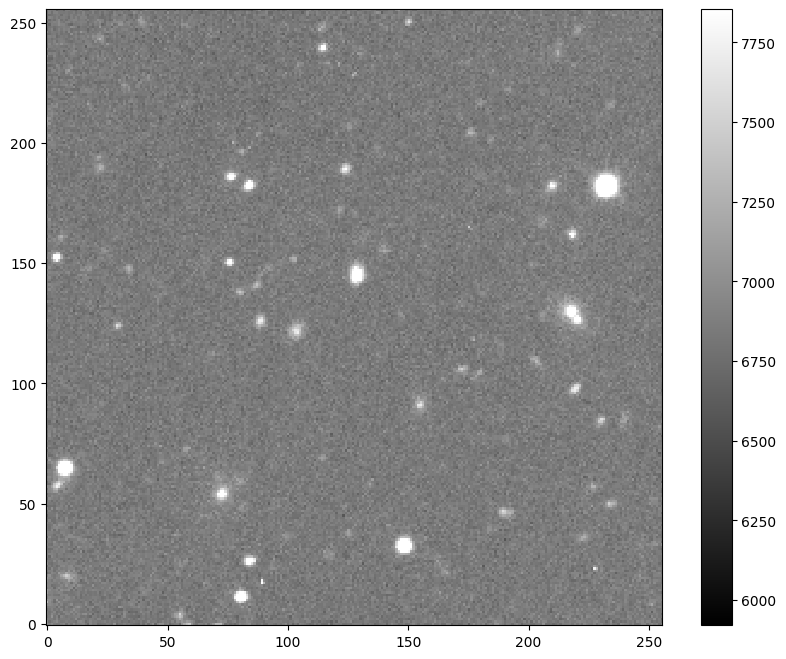

In [83]:
m = np.mean(data)
s = np.std(data)
print(s)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("FinalProjectFig1", bbox_inches = "tight", facecolor="white")

#### Plot background

In [73]:
bkg = sep.Background(data)
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


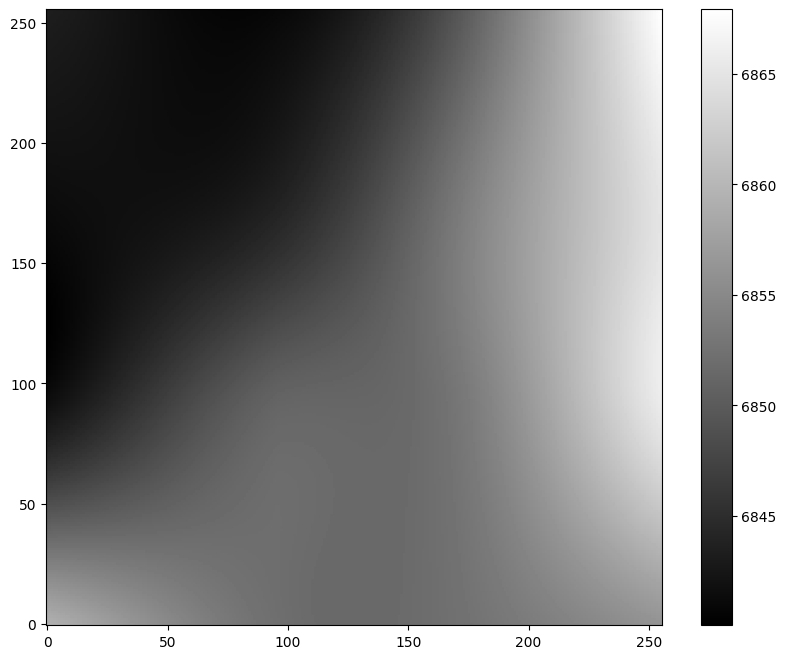

In [74]:
bkg_image=bkg.back()
plt.imshow(bkg_image,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar();
plt.savefig("FinalProjectFig2", bbox_inches = "tight", facecolor="white")

#### Plot background noise

In [75]:
bkg_rms = bkg.rms()

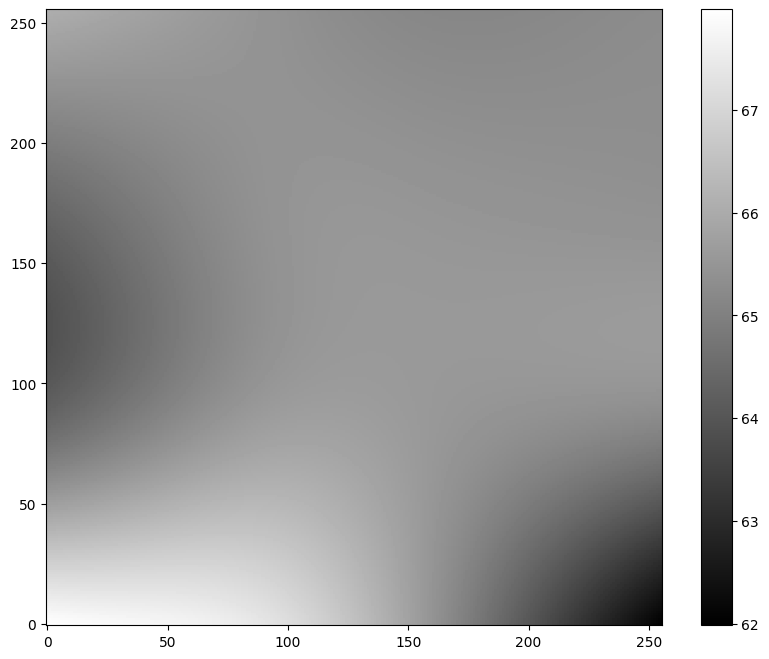

In [76]:
plt.imshow(bkg_rms, interpolation='nearest',cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("FinalProjectFig3", bbox_inches = "tight", facecolor="white")

#### Use sep to detect the objects in the image

In [77]:
data_sub = data - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

len(objects)

69

#### Circle objects and plot

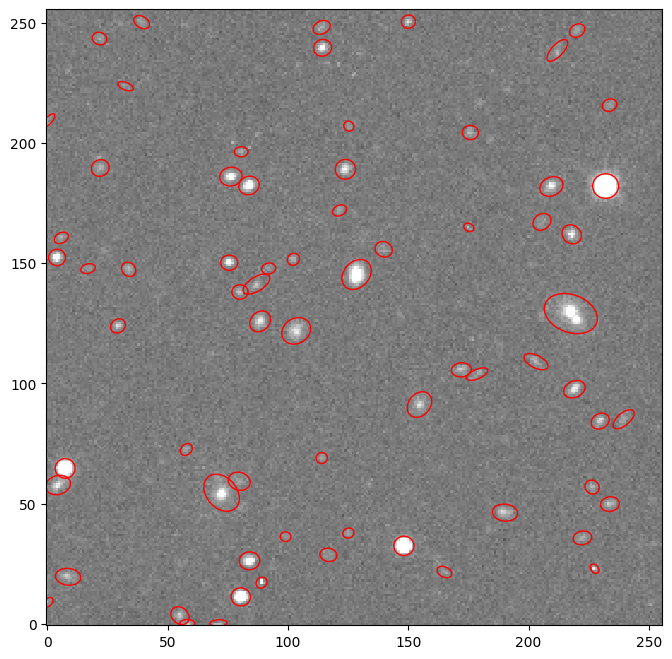

In [78]:
from matplotlib.patches import Ellipse

fig,ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i] * 100./np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig("FinalProjectFig4", bbox_inches = "tight", facecolor="white")

#### List available fields that objects has

In [79]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

#### Measure the light of the objects by performing circular aperture photometry

In [80]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
